In [1]:
import numpy as np
import pickle
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import csv
import matplotlib.image as im
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
from PIL import ImageOps


Using TensorFlow backend.


In [2]:
#----------- Load in the training data -----------------
f = open('driving_log.csv')
csv_f = csv.reader(f)
Img_file_names = []
for row in csv_f:
  Img_file_names.append(row)

y_train = np.zeros((len(Img_file_names)*2))
X_train = np.zeros((len(Img_file_names)*2,55,160,3))

k=0
for i in Img_file_names:
    tmp_img = Image.open(i[0])
    tmp2_img = tmp_img.crop((0,50,320,160))
    tmp2_img.thumbnail((160,55), Image.ANTIALIAS)
    #plt.imshow(tmp2_img)
    #stop
#----------- Norm images -----------------
    X_train[k,:,:,:] = (np.asarray(tmp2_img)-128.0)/128.0
    y_train[k] = i[1]

    tmp3_img = tmp2_img.transpose(Image.FLIP_LEFT_RIGHT)
    X_train[k+1,:,:,:] = (np.asarray(tmp3_img)-128.0)/128.0
    y_train[k+1] = y_train[k]*-1.0
    k=k+2


img_rows, img_cols = 55, 160
input_shape = (img_rows, img_cols, 3)

In [3]:
#----------- Model hyper parameters -----------------
nb_epoch = 1
batch_size = 64

nb_filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)
fully_connected_layer_size = 128
learning_rate = 0.001


#----------- Keras model-----------------
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(fully_connected_layer_size))
model.add(Activation('relu'))
model.add(Dense(1))

optimizer = Adam(lr=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch)

Epoch 1/1
22872/22872 [==============================] - 177s - loss: 0.0128   


In [4]:
from keras.models import load_model
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 53, 158, 32)   896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 53, 158, 32)   0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 26, 79, 32)    0           activation_1[0][0]               
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 26, 79, 32)    0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

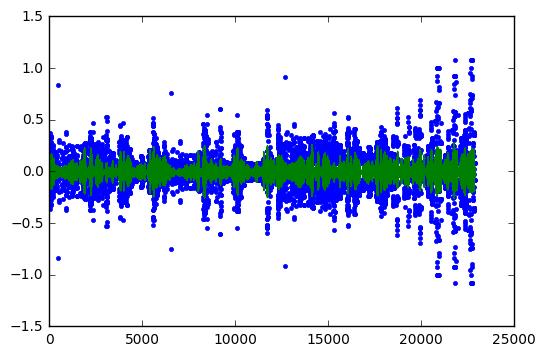

In [5]:
a = model.predict(X_train)
plt.plot(y_train,'.')
plt.plot(a)



In [6]:
import json

model.save('model_12_08_02c.h5') 
json_string = model.to_json()
with open('model_12_08_02c.json', 'w') as outfile:
    json.dump(json_string, outfile)